<span style="color: #E6E6E6;">
<span style="background-color: #00695C; padding:8px; display:block; border-left:4px solid #4682b4">


# Week 6 - Catch-up from week 5 and filtering

This week will be a mixture of exercises from last time (So feel free to skip those if you already did them, and a few new ones, focusing on filtering). Last week, we forgot to add learning objectives, so they'll be added here for both week 5 and week 6

**At the end of this week 5, you should be able to:**

- Understand what the fourier coefficients of a signal mean for the signal's amplitudes and frequencies
- Know how to calculate fourier coefficients of a sampled signal using a series
- Know how to calculate the actual frequencies that the fourier coefficients correspond to
- Know how to calculate the energy of a signal, or of a a specific frequency in a signal
- Know what freuqency bins are, and how to ensure that the frequencies captured by the fourier transformation will be ones relevant for the signal itself
- Know and explain that the fourier coefficient is linear
- Know roughly how to perform the fourier transform using Python packages
- Know how the frequency domain can be used to recognize noisy parts of a signal
- Know how different kinds of noise (white noise, talking noise, fan noise, etc.) can show itself in different ways in both the time- and frequency domains

**Optional**:
- Know what the short time fourier transform is, and why it is useful for analyzing sound
- Know what the "power" of noise corresponds to
- Know something about how different waves on the same frequencies can can interfere with one another, for example in telecommunications

**At the end of week 6, you should be able to**

- Know how convolution is important for discrete filtering of signals
- Know how to apply a discrete filter to a signal in the **time domain**
- Know how to apply a discrete filter to a signal in the **frequency domain**
- Explain what the impulse respones of a filter is
- Know why it can be relevant to look at a filter's impulse response in both the time domain *and* the frequency domain
- Explain the difference between a low-pass, a band-pass, and a high-pass filter
- Explain the intuitive effect of applying a filter, like a low-pass filter to a human speaking

**Optional**
- Implement functions to apply filtering in the time domain

---


Filtering of sinusoidals is fairly straightforward. It is defined a the **convolution** of a filter (Usually denoted $h(n)$) and a time signal $x(n)$. Now you may say:

<div style="text-align: center">
  <em>"But wait, we already know about convolution using images and kernels?"</em>
</div>

Right you are, Harry! There is **next to no difference** from the convolution of images vs the convolution of signals. Where in convolution of images (usually called 2d convolution), you 'slide' a **kernel** across the image and calculate values like so. In signal convolution (usually called 1d convolution), you 'slide' a **filter** across the signal and calculate values. For a continuous signal, this looks like so **(Notice the filter has been flipped as to perform convolution and not cross-correlation)**:

<img src="images/Convolution.gif" 
        style="display: block; margin: 0 auto" />

That was for a **continuous example**, in our case, we will concern our selves with the **discrete case**:

<img src="images/Discrete_convolution_1.gif" 
        style="display: block; margin: 0 auto" />

In both cases, plot of the filter (noted as "Impulse response" in continuous case, and "Kernel" in the discrete response), is what's called the **impulse response** of the filter. 

Explanations of this usually involve fancy maths about delta functions and whatever, but basically it is **the output you get if you pass the filter over a function that consists of a single value** (called a delta, or Dirac delta function):

<img src="images/delta_function_jpeg.jpg"
        alt='The Mighty Delta Function'
        width = 400
        height = 300
        style="display: block; margin: 0 auto" />

You can think this **impulse response** as the "shape" of the filter, in the sense that you see how each new value is calculated. In an actual signal, there would also be surrounding signal values to permute this result, of course.

As for the actual formula for convolution of signal, it is defined both for discrete and continuous signals (we will only use the discrete case in this course):

$$y(k) = x(n) * h(n) = \sum^{\infty}_{n=-\infty} x(n) h(k - n)$$

$$y(t) =  x(t) * h(t) = \int^\infty{-\infty} x(t) h(t - \tau) d\tau$$

---

## Filtering in the frequency domain

First of, we can mention: **you can take the fourier transform of a filter, just as you would a time signal**. Next, probably mentioned before, but one nice property of the fourier transform, is that **convolutions in the time domain become multiplications in the frequency domain**.

And that's pretty much all there is to it... This is really cool since convolution is a rather slow operation, and fourier transforms are not (thanks to the Fast Fourier Transform (FFT (a fast algorithm for getting a fourier transform not covered in this course))). That means, it is sometimes faster to take the FFT of a signal, multiply it with a filter, and take the inverse FFT, than it is to simply convolve the time domain version of the singal with the time domain filter.

**Another useful feature:** is that if you plot a filter in the frequency domain, it's impulse response will just show directly which frequencies will be attenuated or amplified, almost as a regular fourier transform plot would. An example we will see later plotted below:

<div style="display: flex; justify-content: center; gap: 20px;">
  <img src="images/impulse_response.png" alt="Impulse response of filter" width="300"/>
  <img src="images/frequency_domain.png" alt="Same filter fourier transformed" width="300"/>
</div>

Here, to the right is the impulse response, which tells us something about how a single value will be affected **in the time domain** - this isn't really all that useful. However, to the left we can see how the **amplitude of each frequency of a signal** will be affected? That's useful!.

---

</span>

<span style="color: #E6E6E6;">
<span style="background-color: #00695C; padding:8px; display:block; border-left:4px solid #4682b4">

## Part 1 - Exercises from last time

As mentioned, feel free to skip these if you finished most or all of them...

Optional exercises, including thoes from last time, will be at the bottom

</span>

In [1]:
# As in week 4, if you encounter problems playing audio, use this workaround with Sounddevice instead...
import sounddevice as sd

def play_sine_wave_sounddevice(time_signal, sample_rate=44100):
    """
    Play a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        frequencies (list[int]): List of frequencies in the signal
        amplitudes (list[int]): List of amplitudes of each distinct frequency in the signal
        phases (list[int]): List of phases in the signal (in radians)
        duration (int): How long to play the sound
        sample_rate (int, optional): F_s, sample rate to digitally sample the signal, might remove frequencies if too low. Defaults to 44100.
    """
    # Generate sine wave
    sd.play(time_signal, samplerate=sample_rate)
    sd.wait()


<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 1 - Fourier Transform manual calculation

You are given the following discrete signal values, sampled over a duration of $2$ seconds with a sample rate $f_s = 4$

$$x(n) = [ 0,  1.21, -1,  0.21, 0, -0.21, 1, -1.21]$$

#### **1.1. What is the maximum frequency the fourier transform will be able to represent?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

According to the Nyquist rate, we have $f_{max} = \frac{f_s}{2} = \frac{4}{2} = 2$, in reality though, any signal with frequency at exactly $2$ will be seen only as 0's, so it is the technically the supremum of the set $f_k \in [0; 2[$.

</span>

#### **1.2. What are the specific *frequency bins*, meaning for any $X(k)$ (output from the fourier transform) what specific frequency will that fourier coeffcient correspond to for this specific case?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Remember, we get the k'th frequency bin by calculating:

$$f_k = \frac{k}{N} \cdot f_s$$

So the specific values will be:

$$\mathbf{f} = [0, 0.5, 1, 1.5, 2]$$

Anything above here will be the negative frequencies, so the same frequencies in reality

</span>

#### **1.3. Calculate the fourier coefficient corresponding to k = 2**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Here we just use the formula above with the associated values, it is a bit of work though

$$X(2) = (0\cdot\exp(\frac{-(2\cdot 2\cdot i\cdot \pi)\cdot0}{8})) + 1.21\cdot\exp\frac{(-(2\cdot2\cdot i\cdot \pi)}{8}) - 1\cdot\exp(\frac{-(2\cdot2\cdot i\cdot \pi)\cdot2}{8}) + 0.21\cdot\exp(\frac{-(2\cdot2\cdot i\cdot \pi)\cdot 3}{8}) + 0\cdot\exp(\frac{-(2\cdot2\cdot i\cdot \pi)\cdot 4}{8}) - 0.21\cdot\exp(\frac{-(2\cdot2\cdot i\cdot pi)\cdot5}{8}) + 1\cdot\exp(\frac{-(2\cdot 2\cdot i \cdot \pi)\cdot6}{8}) - 1.21\cdot\exp(\frac{-(2\cdot2\cdot i \cdot \pi)\cdot 7}{8}))$$

$$ = 2$$

Which when we then normalize by the amount of samples gives us

$$X(2) = \frac{2}{8} = 0.25$$

And since we need to overlay positive and negative frequencies, we multiply by two:

$$0.25 \cdot 2  = 0.5$$

So we can say that the amplitude associated with the frequency $f_k =  \frac{k}{N} \cdot f_s = \frac{2}{8} \cdot 4 = 1$ is $0.5$ 

COPY this into maple if you just wanna see it there

bs(0*exp(-(2*2*I*Pi)*0/8) + 1.21*exp(-(2*2*I*Pi)/8) - exp(-(2*2*I*Pi)*2/8) + 0.21*exp(-(2*2*I*Pi)*3/8) + 0*exp(-(2*2*I*Pi)*4/8) - 0.21*exp(-(2*2*I*Pi)*5/8) + exp(-(2*2*I*Pi)*6/8) - 1.21*exp(-(2*2*I*Pi)*7/8))

Though you should really be using Python for this

</span>

</span>

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import Audio
# import sounddevice as sd # Needed to play sounds - Only use if IPython.display.Audio does not work
from scipy.io.wavfile import read
from scipy.fft import fft, fftfreq, ifft # Technically used here is the fast fourier transform because it is... fast, don't convern yourself with this
from scipy.signal import butter, filtfilt, convolve, stft
import librosa
import librosa.display

In [3]:
def generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = sum([amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i]) for i in range(len(frequencies))])
    return wave

def calculate_fourier_coeffcients(signal_values, sample_rate=1, v=True):
    N = len(signal_values)
    coeffs = []

    # Calculate fourier coefficient for each frequency bin
    for k in range(N):
        # Create values to sum in order to obtain fourier coefficients
        prepared_to_sum = [x_n * np.exp(-2j * np.pi * k * n / N) for n, x_n in enumerate(signal_values)]
        coeffs.append(sum(prepared_to_sum) / N) # Divide by N to normalize frequency values
        
        if v:
            frequency = ((k / N) * (sample_rate))
            absolute_coefficient = np.absolute(coeffs[k]) # Get absolute value to remove imaginary parts
            print(f"The fourier coeffcient associated with frequency {frequency:.3f}: {absolute_coefficient:3f}")
            if k == N / 2:
                print("############ Frequencies Loop ############")

    return coeffs

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 2 - Calculating fourier coeffients with Python

Far easier it is to create Python functions that calculate the fourier coeffcients for us.

For each exercise, you can test your implementation in the cell below

#### **2.1. 💻 The first of the above two functions generate a sine wave based on a series on input amplitudes, phases, frequencies, sample rates and a duration of the signal. The second should calculate the fourier coefficients of said sine wave. Complete the function to calculate the fourier coefficients.**


#### **2.2. 💻 Change the values of the sample rate or frequency to see if you can make a signal whose frequencies cannot be accurately represented by the fourier transform**

#### **2.3. What do you think happens with the fourier coefficients when the signal contains a frequency that does not correspond to any of the frequency bins?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

The coefficients that would normally be associated with the now unrepresentable frequency, will be spread unto the remaining coefficients much akin to spectral leakage. 

The frequency bins closest to the actual frequency will recieve the most, while thoes further away recieve less.

</span>

</span>

In [4]:
frequencies = [0.5, 2]
amplitudes = [0.5, 1]
phases = [0, 0]

sample_rate = 5
duration = 1

signal_values = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)
coeffs = calculate_fourier_coeffcients(signal_values, sample_rate=sample_rate, v=True)

The fourier coeffcient associated with frequency 0.000: 0.307768
The fourier coeffcient associated with frequency 1.000: 0.117557
The fourier coeffcient associated with frequency 2.000: 0.501318
The fourier coeffcient associated with frequency 3.000: 0.501318
The fourier coeffcient associated with frequency 4.000: 0.117557


<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### Exercise 3 - Spectral Leakage

In practice, simply being above the nyquist rate isn't everything you need to get the lower frequencies. The amount of samples also has an effect.

In the code block below, we generate a signal with two frequencies: $F_1 = 0.25$ and $F_2 = 2$. We sample the signal with a sampling rate of $F_s = 5$ for a total of $\mathbf{1}$ **second**.

After that, we try to recover the fourier coefficients of the sampled signal.

**1. In the code below, we are not able to recover the coefficient related to the frequency $F_1 = 0.25$, instead getting all kinds of coefficients with frequencies not in the signal, why is this?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

This is an issue with our frequency bins. As we learned last week when we had to make our harmonic periodic basis matrix, we could only represent frequencies that were integer multiples of our fundamental frequency.

In fourier analysis, we get $\text{sample rate} \cdot \text{duration} = N$ number of samples, and therefore, frequency bins. And the distance between each frequency bin, will be $\Delta f = \frac{\text{sample rate}}{N}$. 

In this case, the nyquist rate is $\frac{\text{sample rate}}{2}$, and therefore the maximum frequency will be $2$ (before frequencies loop). The distance between each sample will be $\frac{5} / {5} = 1$, which means the frequency $F_1 = 0.25$ has "nowhere to go". 

In this case, it's energy is spread across the remaining frequencies in the form of **spectral leakage**, and this is why we see energy in frequencies that are not in the original signal...

</span>

**2. How can you change the values of sample_rate and duration to alleviate this problem?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Here, we see that the problem stems from $\Delta F$ not being small enough, since it depends on both the sample rate, and $N$, we might try to change either one of those.

However, increasing the sample rate, while increasing $N$, would also increase the nyquist rate at the same time, so it won't do anything.

Therefore, the actual solution is to increase the **sampling duration**. Specifically, we want to increase it to 4. That way, the amount of samples increases to $N = 20$, and $\Delta f = \frac{5}{20} = \frac{1}{4}$, which is exactly the frequency we want to find.

---

You can also think of it a bit more intuitively: A sine-wave with a frequency of $0.25$, takes $4$ seconds to complete a single cycle. If we look at the partial wave before it has completed, we cannot be sure that it will be one of frequency $0.25$, or just a convoluted combination of some other set of waves.

In short, we do not only need to worry sampling above the nyquist rate, but also that the time we sample is enough to catch the slowest of our frequencies.


</span>

**3. What would you say is a general rule of sampling when you need to recover both very high and very low frequencies?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

It is obvious that we should have high sample rates to recover high frequencies, because of the Nyquist rate and all that. But to recover low frequencies, we must make sure to sample the signal long enough that we observe the whole period. If we for example sample with 44100Hz for 1 second, we get 44100 samples, which might seem like a lot, but since we only sample for 1 second, we cannot fully observe a signal with a frequency of 0.25, for example.       

</span>

</span>

In [5]:
frequencies = [0.25, 2]
amplitudes = [0.5, 1]
phases = [0, 0]

sample_rate = 5
duration = 4

signal_values = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)
coeffs = calculate_fourier_coeffcients(signal_values, sample_rate=sample_rate, v=True)

The fourier coeffcient associated with frequency 0.000: 0.000000
The fourier coeffcient associated with frequency 0.250: 0.250000
The fourier coeffcient associated with frequency 0.500: 0.000000
The fourier coeffcient associated with frequency 0.750: 0.000000
The fourier coeffcient associated with frequency 1.000: 0.000000
The fourier coeffcient associated with frequency 1.250: 0.000000
The fourier coeffcient associated with frequency 1.500: 0.000000
The fourier coeffcient associated with frequency 1.750: 0.000000
The fourier coeffcient associated with frequency 2.000: 0.500000
The fourier coeffcient associated with frequency 2.250: 0.000000
The fourier coeffcient associated with frequency 2.500: 0.000000
############ Frequencies Loop ############
The fourier coeffcient associated with frequency 2.750: 0.000000
The fourier coeffcient associated with frequency 3.000: 0.500000
The fourier coeffcient associated with frequency 3.250: 0.000000
The fourier coeffcient associated with frequenc

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### Exercise 4 - Mathematical properties of the fourier transform

Two of the most touted properties of the fourier transform are arguably:

1. It is linear, meaning $F(aX + bY) =  a\cdot F(X) + b \cdot F(Y)$
   1. This means, adding the scaled versions of signals in the time domain, equates to adding the scaled versions of their frequencies in the frequency domain
2. Convolutions in the time domain are multiplications in the frequency domain and vice versa, often written as  $f(x) * h(k) = F(X) \cdot H(X)$
   1. You need not know what this means specifically, but we will use it more next week


#### **💻 4.1. Show this condition of linearity by plotting what happens in the frequency domain when you add two scaled sine waves together. You can expand the cell below as a 'skeleton' for your code, or you can code it from scratch yourself**

</span>

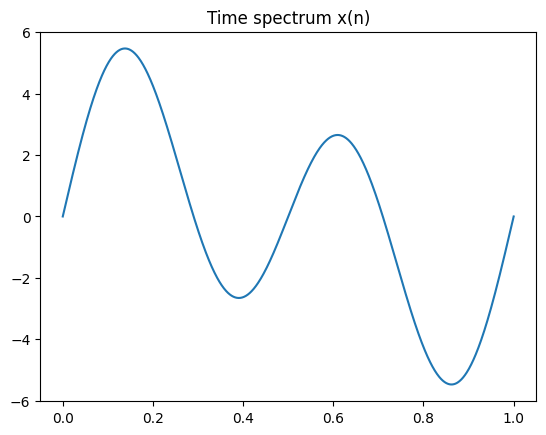

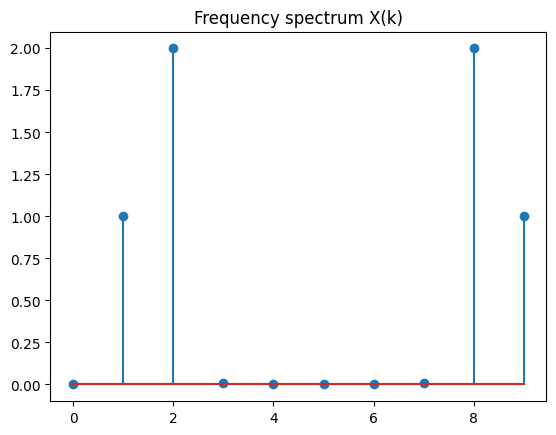

In [6]:
# Set duration of signal
duration = 1

# Set sample rate
sample_rate = 1000

# Create time values for signal
t = np.linspace(0, duration, int(sample_rate * duration))


# Define signals...
frequency_1 = 1
sine_wave_1 = np.sin(2 * np.pi * frequency_1 * t)

frequency_2 = 2
sine_wave_2 = np.sin(2 * np.pi * frequency_2 * t)

# Create linear combination of signals
a = 2
b = 4
signal_values = a*sine_wave_1 + b*sine_wave_2

# Get coefficients using previous fourier coefficients function
coeffs = np.abs(calculate_fourier_coeffcients(signal_values, sample_rate=sample_rate, v=False))


# Plot signal in time and frequency domain
plt.plot(t,signal_values)
plt.title("Time spectrum x(n)")
plt.show()


plt.stem(coeffs[:10] + coeffs[-10:]) # Plot first 10 coefficients and last 10 coefficients
# (last 10 will be the complex coefficients we usually remove)
# We only plot the first and last 10 since the rest will just be zero anyways, and will make for an ugly plot otherwise
plt.title("Frequency spectrum X(k)")
plt.show()

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 5 - Fourier transforms using packages 

As ML enthusiasts, we obviously never implement ourselves what the plebs have already done for us. In this case, scipy already has a rather good FFT implementation

Using the FFT functions from scipy isn't actually **that** simple

#### **💻 5.1. Complete the sk_fourier_transform function to get the fourier coefficients (yf) and the fourier frequency bins (xf) from a given time signal. If you're having trouble, be sure to look up documentation or examples online for this. Test your implementation using the cell below.**

#### **💻 5.2. Change the plot_audio_signal function to only plot the positive frequencies, and get the wholly correct value of the amplitudes.**

#### **💻 5.3. Test the implementation in cases where there are frequencies that do not fit into frequency bins, and in cases were aliasing is present. How does the fourier spectrum look.**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

The frequencies that do not fit in should be distributed amongst the remaining frequencies. Visually this can seem as 'fat line' of frequencies that are all really really low.

We can see that the signal at frequency $0.0005$, and at frequency $7000$, were not found by the fourier analysis.

</span>

</span>

In [7]:
def sk_fourier_transform(time_signal, duration, sample_rate, positive_spectrum_only=False):
    """
    Use scipy to calculate the fft of a time signal
    """
    # Get the timesteps that the signal exists over
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    
    # Frequency domain (FFT)
    N = len(time_signal)
    yf = fft(time_signal) # Fourier coefficients
    xf = fftfreq(N, 1 / sample_rate) # Frequency values for the for the fourier coefficient bins

    # Normalize amplitude values by number of samples
    yf = yf / N

    # Here we filter away the negative frequencies
    if positive_spectrum_only:
        # Get up to the Nyquist frequency (half the samples) to get only positives
        xf = xf[:N // 2]
        yf = yf[:N // 2]

        # Remove imaginary parts of signal
        yf = np.abs(yf) 

        # Since we removed the negative frequencies, mulitply all positive frequencies by 2
        # We do from 1: since we do not multiply the DC component (zero frequency)
        yf[1:] = 2 * yf[1:]

    return xf, yf, t


def plot_audio_signal(t, signal_time, signal_freq, signal_freq_bins, duration=None):
    """
    Plot a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        Same as play_sine_wave, lmao
        If duration is none, will automatically figure out duration from max frequency so you can actually see the frequencies
        This might lead to *some* aliasing in the plots themselves
    """
    # Create duration of signal if not already there
    if not duration:
        duration = 100 / max(frequencies)

    N = len(signal_time)
    
    # idx = np.arange(N // 2) # Complete to only take positive part of spectrum

    # Plot
    plt.figure(figsize=(12, 6))
    
    # Time domain plot
    plt.subplot(2, 1, 1)
    plt.plot(t, signal_time)
    plt.title("Audio signal in time domain")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot frequency domain
    plt.subplot(2, 1, 2)
    # plt.stem(signal_freq_bins, (1.0 / N * np.abs(signal_freq)))  # Normalized magnitude
    plt.stem(signal_freq_bins, signal_freq)
    plt.title("Audio signal in frequency domain")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


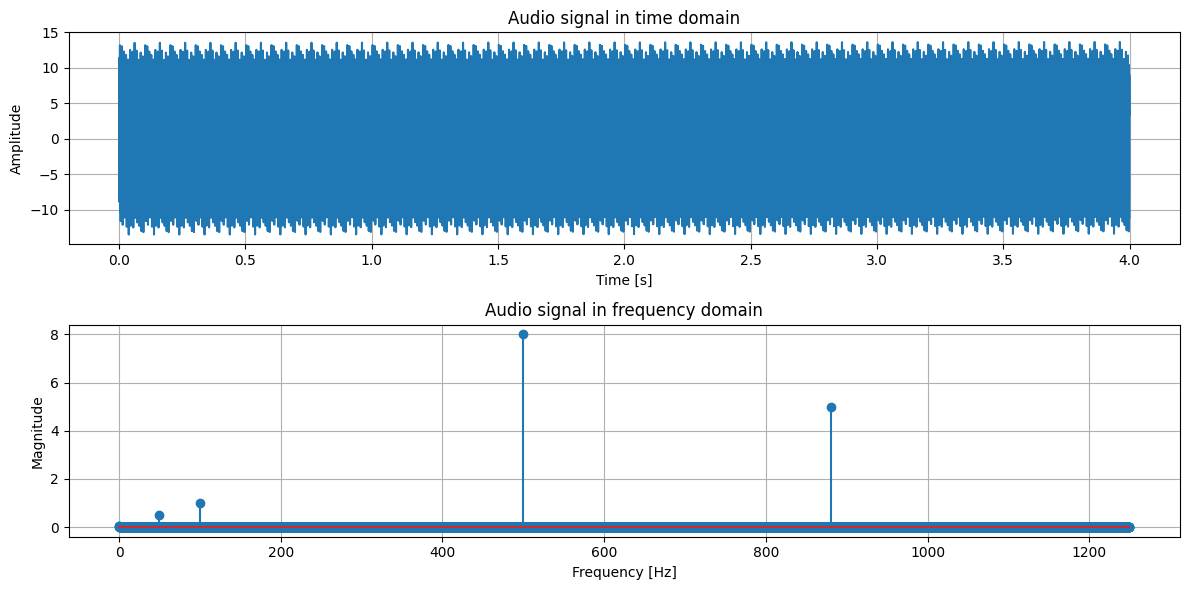

In [8]:
frequencies = [50, 100, 0.0005, 880, 7000]
amplitudes = [0.5, 1, 10, 5, 8]
phases = [0, 0, 0, 0, 0] 

sample_rate = 2500
duration = 4

time_signal = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)

xf, yf, t = sk_fourier_transform(time_signal, duration, sample_rate, positive_spectrum_only=True)

plot_audio_signal(t, time_signal, yf, xf, duration=duration)

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 6 - Noisy Signals

In real life, we never have noise-free observations, so it is useful to see how noise affects our final signal as well as the fourier spectrum. The below code introduces normal distributed noise to a given signal with the following, common model:

$$y(n) = s_n + \eta_n  \text{ }|\text{ }  \eta_n \sim \mathcal{N}(0, \sigma)$$

*Where $s_n$ is our signal of interest, $\eta_n$ is the system noise and $y(n)$ is our observed signal*

#### **💻 6.1. Complete the implementation to add noise to the observed time signal**

#### **6.2. How does the fourier spectrum change when noise is introduced? How are the noise 'frequencies' expressed. Why do you think this is the case?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

White noise is obviously completely different from timestep to timestep, so can appear as both very fast changes from one step to the next, or very slow moving tendencies. Really this means that it adds frequencies to the fourier spectrum that aren't really there. Really white noise is said to contain 'all frequencies'.

</span>

#### **6.3. Say you got an observed signal with noise as shown below, how could you approach removing the noise to only get the input frequencies out?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

One (dreadfully simple) solution, is to just remove all frequencies with an amplitude below a certain level.

The assumption here is that the signal of note is strong enough to cut through the noise.

That means the "Signal to Noise ratio" is high. In situations where this is not the case, we typically need to know something about the statistics of the signal or the noise to say anything of a noised signal.

</span>

#### **6.4 Keeping in mind your idea for removing noise, how would increasing the variance of the noise impact this? Try increasing the variance of the noise and see what happens to the "noise frequencies" and the actual frequencies in the fourier spectrum**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Increasing the variance of the noise means the noise has greater possibility of greater 'swings' at each timestep. Meaning the average impact on the signal will be higher. 

Thus, more variance in the white noise, means we have a harder time discerning the actual signal. With amplitudes of around 2, and a noise variance of 4, the true signal already begins to wash out.

</span>

#### **💻 6.5 Try changing the mean value of the noise from 0 to add a so called "DC component". What do you think this represents? How is it reflected in the fourier spectrum?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

In this case, it would actually add an average value to the noise. Not one of note, since we could easily get rid of it if we knew it (and we can calculate it empirically quite easily!). 

It can come from a bunch of places if we have bad readings, or if we sample at exactly $2\cdot F$ for any frequency in our signal, it will appear as a DC component. Why it is called a DC component you need to ask more electrical engineering inclined people about.

It can be seen in the fourier spectrum as a spike at exactly 0

</span>

</span>

/home/cicero/Projects/Signals-And-Data-Autumn-2024/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/cicero/Projects/Signals-And-Data-Autumn-2024/.venv/lib/python3.11/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/home/cicero/Projects/Signals-And-Data-Autumn-2024/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


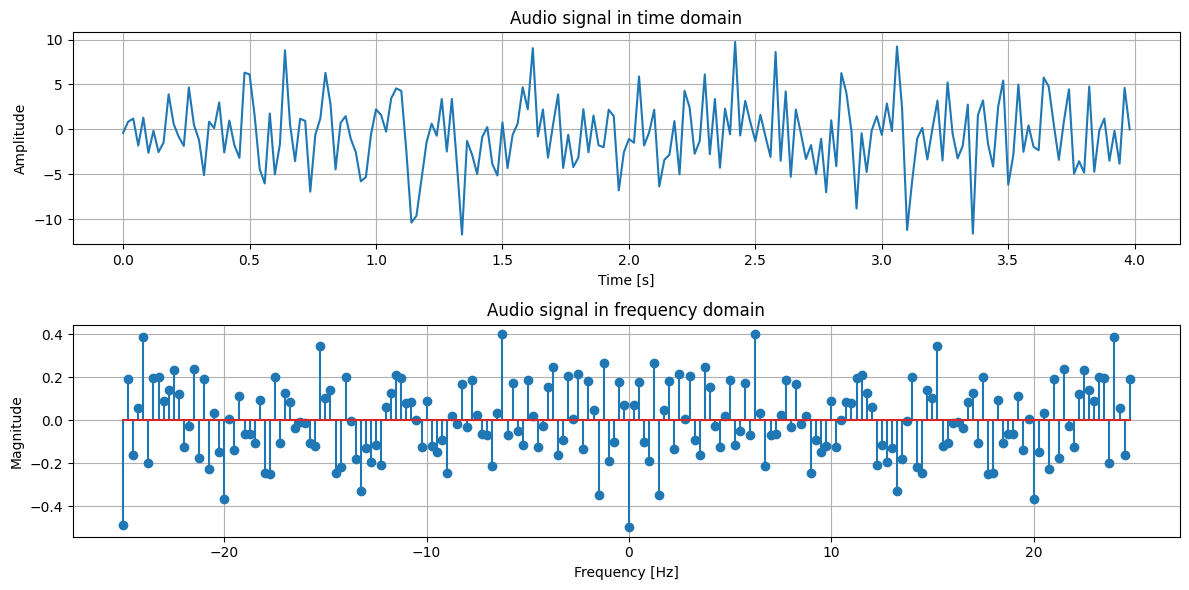

In [9]:
def create_noised_signal(time_signal, noise_mean, noise_var):
    noise = np.random.normal(loc=noise_mean, scale=noise_var, size=len(time_signal))       
    noised_signal = time_signal + noise
    return noised_signal

frequencies = [0.5, 2, 5]
amplitudes = [0.5, 1, 2]
phases = [0, 0, 0] 

sample_rate = 50
duration = 4

time_signal = generate_sine_wave(amplitudes, frequencies, phases, sample_rate, duration)
noised_signal = create_noised_signal(time_signal, noise_mean=0, noise_var=4)

xf, yf, t = sk_fourier_transform(noised_signal, duration, sample_rate)

plot_audio_signal(t, noised_signal, yf, xf, duration=duration)

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### Exercise 7 - Looking at noised signals

Another really useful property of the fourier transform, is that we as humans just cannot get much information from the time spectrum in general. Below is code to plot two different noised signals in the time and frequency domain.

#### **7.1. Consider the two noised signals below. Here the exercise is mostly to realize the importance of the frequency domain, especially in tasks that require pinpointing specific frequencies in signals. In the time domain, the signals look almost identical, in the frequency domain, there is a huge and obvious difference.**

**You will see this be useful again next week during assignment 2 when you need to classify brain waves based on their frequency content.**

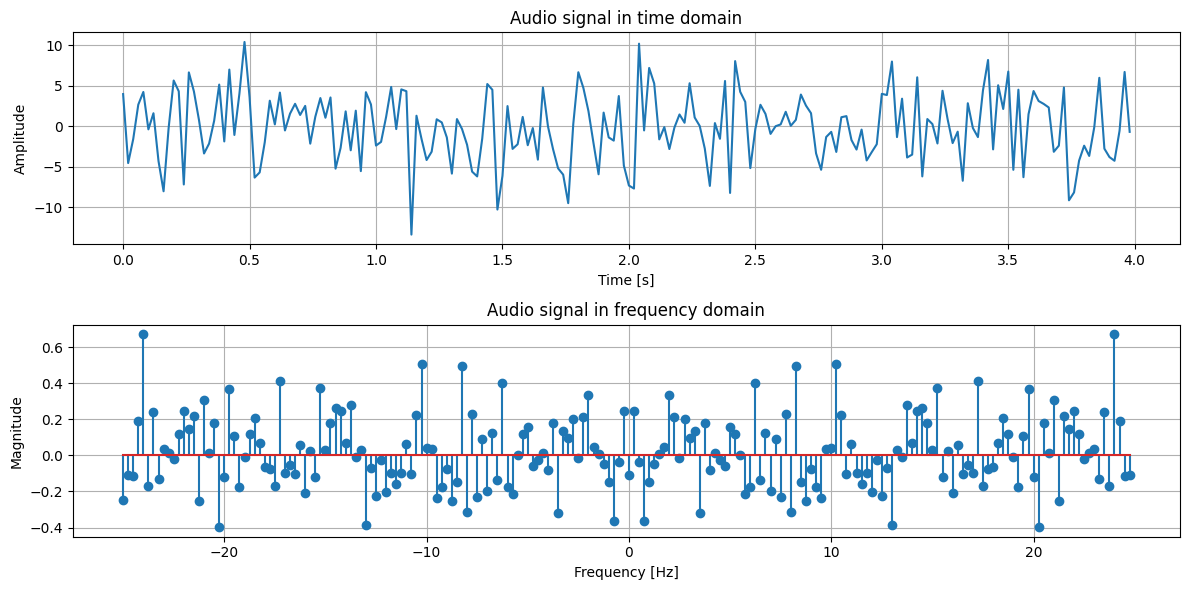

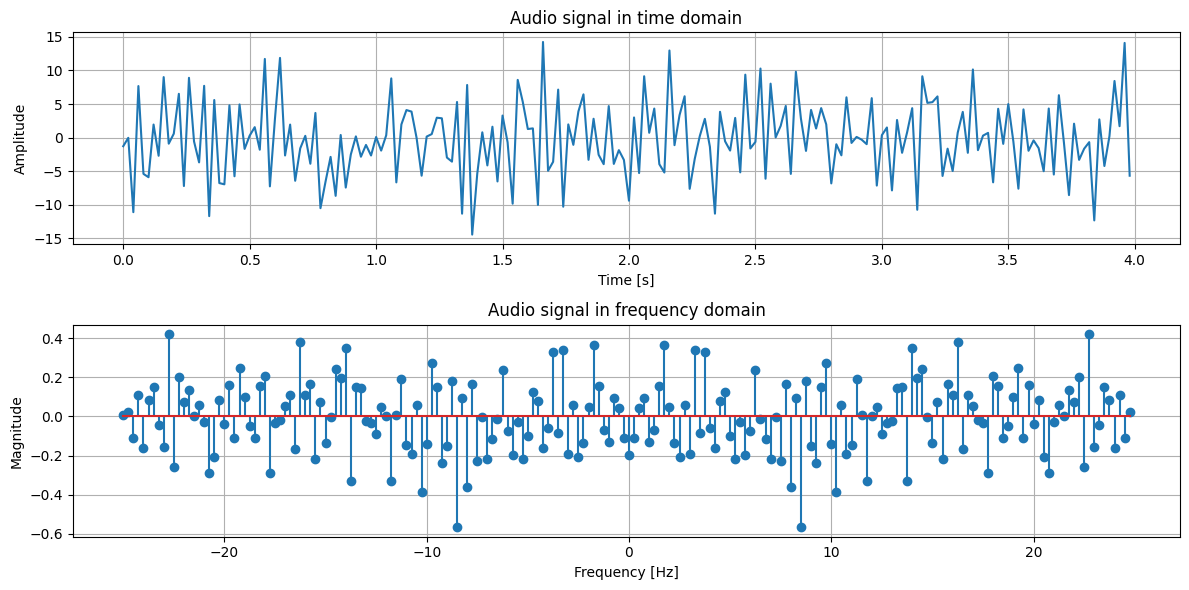

In [10]:
frequencies_signal_1 = [0.5, 2, 5]
amplitudes_signal_1 = [0.5, 1, 2]

frequencies_signal_2 = [20]
amplitudes_signal_2 = [5]

phases = [0, 0, 0] 

sample_rate = 50
duration = 4

time_signal_1 = generate_sine_wave(amplitudes_signal_1, frequencies_signal_1, phases, sample_rate, duration)
time_signal_2 = generate_sine_wave(amplitudes_signal_2, frequencies_signal_2, phases, sample_rate, duration)

mean = 0 # Change this to introduce a 'dc component' to the noise
variance = 4 # Change this to increase the prescence of the noise

noised_signal_1 = create_noised_signal(time_signal_1, mean, variance)
noised_signal_2 = create_noised_signal(time_signal_2, mean, variance)

xf_1, yf_1, t = sk_fourier_transform(noised_signal_1, duration, sample_rate)
plot_audio_signal(t, noised_signal_1, yf_1, xf_1, duration=duration)

xf_2, yf_2, t = sk_fourier_transform(noised_signal_2, duration, sample_rate)
plot_audio_signal(t, noised_signal_2, yf_2, xf_2, duration=duration)


<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### Exercise 8 - Human speech and noise

As previously mentioned, most of human speech is typically around the 90 - 3500 Hz range. It can be interesting to look at actual voice signals to see how they behave. The cell below loads one of four voice signals spelling out "S O F A"

We redefine fourier transform and plotting functions to work with loaded data

1. A clean signal where only the speech is presen
2. A signal where white noise has been added in the background
3. A signal where non-white noise in the form of a fan has been added
4. A signal where non-white noise in the form of human speech has been added

#### **8.1. 💻 Load the clean signal and see if you can recognize the difference between consonants and vowels in the time domain, what about the frequency domain?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

In general for speech, consonants will be a bit higher frequencies. This is especially a pain when dealing with filtering of speech signals, since consonants add a lot of meaning to speech, and are often the first to go if high-pass filters are applied

</span>

#### **8.2. 💻 Load the two different noised signals. How do the different types of noise stand out from one another?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

The talking noise is spread a lot more over the entire frequency domain, as opposed to the fan noise, which is almost entirely one frequency

</span>

#### **8.3. 💻 Play with the function mix_noise to mix different types of noise with the clean signal. What combinations of noise make the clean signal the most unintelligeble from an audio standpoint?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

All of them. Looking after individual frequencies in signals in the time domain is typically a terrible idea, this is no different

</span>

#### **8.4 What combinations of noise make the clean signal the most unintelligeble when looking at just the plot of the time and frequency domain**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

The speech, no question. The fan noise could be filtered out extremely easily, by just removing the few frequencies it occupies. The white noise is more difficult, but we could use options discussed before, just removing low frequencies. The talking noise is far harder. Since it occupies the same frequency band as the signal (which is also talking), we cannot 'safely' remove the talking noise without possibly removing some of the signal.

This whole seperating different noise and signal types from one another is a whole can of worms called "source sepreation". If you want, you can read about a method called ICA (Independent Component Analysis), typically used for this purpose.

</span>

#### **8.5. In general, what types of the presented noise do you think are the most difficult to remove out when the clean signal is human speech?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

In general, speech is hella hard to filter out. If you think about it, it makes sense. From a data and statistics viewpoint, "important" speech is almost exactly the same as "noise" speech. The only difference being perhaps the amplitude (which might not even be consistent), and the semantic content (which can be extremely difficult to deduce).

This field typically occupies the domain called "speech enhancement", which seeks to remove additive noise in speech signal to clarify them.

</span>

</span>

In [11]:
# Redefine fourier transform and plot functions because they don't really work when we have signals with set durations
def sk_fourier_transform(time_signal, t, sample_rate):
    """
    Use scipy to calculate the fft of a time signal
    """
    # Get the timesteps that the signal exists over
    t = np.linspace(0, time_signal.size / sample_rate, time_signal.size, endpoint=False)
    
    # Frequency domain (FFT)
    N = len(time_signal)
    yf = fft(time_signal) # Fourier coefficients
    xf = fftfreq(N, 1 / sample_rate) # Frequency values for the for the fourier coefficient bins
    
    return xf, yf, t


def plot_audio_signal(t, signal_time, signal_freq, signal_freq_bins, duration=None, max_freq=5000):
    """
    Plot a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        Same as play_sine_wave, lmao
        If duration is none, will automatically figure out duration from max frequency so you can actually see the frequencies
        This might lead to *some* aliasing in the plots themselves
    """
    # Create duration of signal if not already there
    if not duration:
        duration = 100 / max(frequencies)

    N = len(signal_time)
    
    idx = np.arange(N // 2) # Complete to only take positive part of spectrum

    if max_freq is not None and max_freq > 0:
        idx = idx[:max_freq]


    # Plot
    plt.figure(figsize=(12, 6))
    
    # Time domain plot
    plt.subplot(2, 1, 1)
    plt.plot(t, signal_time)
    plt.title("Audio signal in time domain")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot frequency domain
    plt.subplot(2, 1, 2)
    plt.plot(signal_freq_bins[idx], (2.0 / N * np.abs(signal_freq[idx])))  # Normalized magnitude
    plt.title("Audio signal in frequency domain")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Sample rate is: 48000Hz
noise_examples/fan_noise.wav
noise_examples/talking.wav


/tmp/ipykernel_4747/2934456142.py:15: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, noise_signal = read(noise_path)


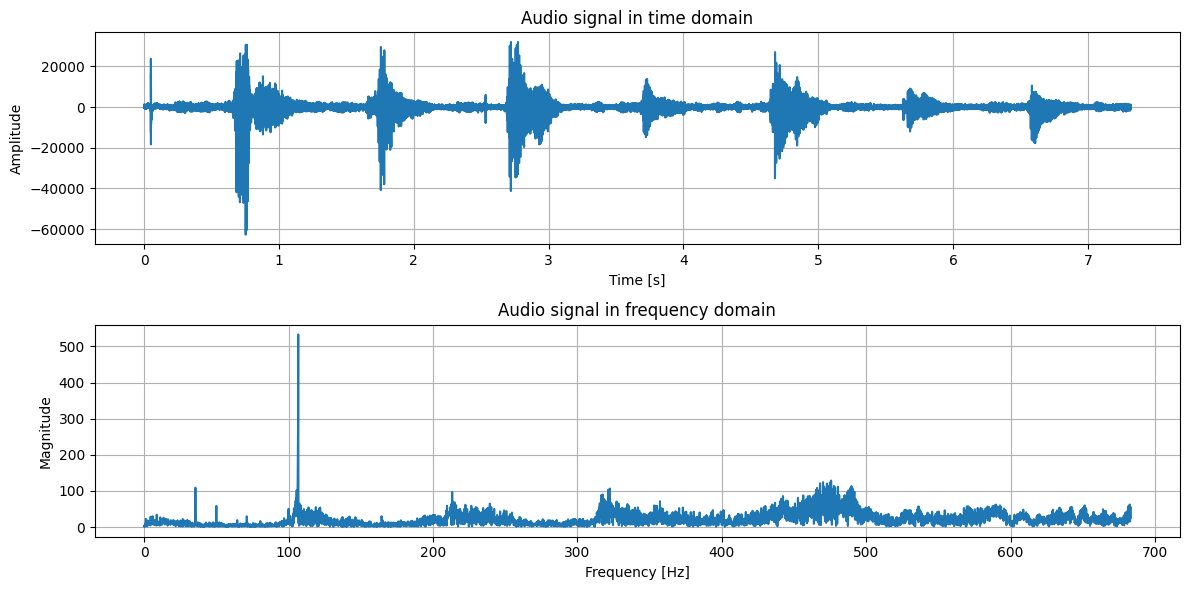

In [12]:
sofa_path = "audio/sofa.wav"
fan_noise_path = "noise_examples/fan_noise.wav"
talking_path = "noise_examples/talking.wav"

sample_rate, time_signal = read(sofa_path)
time_signal = 5 * np.array(time_signal[1:, 0],dtype=float)   # Indexed to make N odd


def mix_noise(observed_signal, noise_paths, noise_amplitudes, white_noise_variance=10, whtie_noise_mean=0, white_noise_amplitude=10):
    """
    Load and mix different white noise sources
    """
    for noise_path, noise_amplitude in zip(noise_paths, noise_amplitudes):
        print(noise_path)
        _, noise_signal = read(noise_path)
        noise_signal = np.array(noise_signal[1:, 0],dtype=float)[: len(observed_signal-1)]
        observed_signal += noise_signal * noise_amplitude

    # Create and add white noise
    white_noise = np.random.normal(loc=whtie_noise_mean, scale=white_noise_variance, size=len(time_signal))
    observed_signal += white_noise_amplitude * white_noise

    return observed_signal


print(f"Sample rate is: {sample_rate}Hz")

time_signal = mix_noise(time_signal, [fan_noise_path, talking_path], [0.05, 0.05])

# Create fourier transform, plot signal
xf, yf, t = sk_fourier_transform(time_signal, duration, sample_rate)
plot_audio_signal(t, time_signal, yf, xf, duration=duration, max_freq=5000)
Audio(time_signal,rate = sample_rate)

<span style="color: #E6E6E6;">
<span style="background-color: #00695C; padding:8px; display:block; border-left:4px solid #4682b4">

## Part 2 - Exercises on filtering

These are exercises you haven't seen before

As mentioned, after these will be optional exercises for this, and last week

---

## Quick Catch up: Filtering

As mentioned, filtering is rather easy enough, we are going to focus on just convolution, plotting filters and using filters in time and frequency domain. As a reminder, the formula for signal convolution is

$$y(k) = x(n) * h(n) = \sum^{\infty}_{n=-\infty} x(n) h(k - n)$$

### High-, low, and band-pass filtering

The most commonly used filters, are usually some variant of high-pass filters, low-pass filters and band-pass filters. They work in the following ways:

- **High-pass**: Let the high frequencies pass, meaning the result is a signal with only high frequencies
- **Low-pass**: Let the low frequencies pass, meaning the signal will only have low frequencies
- **Band-pass**: Let frequencies in a specific band (for example 400 to 800 Hz) pass, meaning the signal will only have those frequencies

If we look at how these filters look in the **frequency domain**, it is roughly equal to this:

<div style="text-align: center;">
  <img src="images/actual_filters.png" alt="" width="600"/>
</div>

Ignore the band-stop filter, it is not important for our purposes. 

**Remember**, these are in the frequency domain, so the x-axis will show *what* frequencies will be affected, and the y-axis will show how those frequencies will be affected by the filter. 

So, if $h$ is our filter, $h(5) = 10$, for example, means that the amplitude of the frequency $5$ in our signal, will be multiplied by $10$ after applying the filter $h$


</span>



<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 9 - Filtering in Python

*We meant to have an exercise centered around implementing your own convolution function to use a pre-made filter to do low-pass filtering... However that was prohibitively overcomplicated. Take that as a lesson, that if someone else has done it, it is probably better than what you can make yourself*

*That said, we still wanna 'get' filtering. Both manually and using packages. Below the functions butter_lowpass and butter_lospass_filter create a so-called [butterworth](https://en.wikipedia.org/wiki/Butterworth_filter) filter and apply it to a signal respectively.*

In the two cells below: We've implemented a function to make, and apply a "butterworth filter". Which is essentially "the closest we can get to low-pass, high-pass, or band-pass filters, IRL". We wanna look at the output of the code.

#### **9.1. Inspect the plots created by running the code two cells below. What are the visibile effects on time and frequency domain?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">


Time domain-wise, we can't really see much, some values are attenuated, some aren't. Frequency wise, we definately see that all above a certain point just disappear. This goes for both the positve and negative frequencies, as would be expected.

</span>

#### **9.2. Change the value of the frequency_cutoff, how does this change the plots and the resulting audio?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

This should just change the point at which the frequencies on both sides cut off, so we get less area in the middle.

</span>

#### **9.3. The Butterworth filter is described as a 'maximally flat magnitude filter' what do you think this refers to. Why can we in actuality not just construct a completely flat filter?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

This is a bit of a tricky one, but the easy answer for an electrical engineer would be: "Physical constraints, lol"

In our case, as pseudo-mathematicians, it is more nuanced. The "ideal low-pass filter" has a $sinc$ function as its kernel. The sinc function is defined for all numbers on the real plane $\mathbb{R}$, so to use such a kernel on our data, we would need a kernel of infinite length... problematic

In the frequency doamin the problem is likewise: Here we can easily define our filter as just a cutoff, but unless we have infinite resolution of frequencies (meaning our fourier transform shows **all** frequency bins), not all values will be cut off, leading to some frequencies we want cut off surviving. The only way we can solve this is by having a time signal of infinite length... problematic

IN actuality, this is solved by having filters that "slope" on their way to the cut-off frequencies, as can be seen below. A better filter is usually seen as one with a steeper slope.

<!-- TODO: Perhaps add a back-up picure showing the "desired" filters? -->

<img src="images/actual_filters.png" 
        style="display: block; margin: 0 auto" />
</span>

</span>


In [13]:
def butter_lowpass(cutoff, fs, order=5):
    """
    Create a butterworth lowpass filter, given a cutoff frequency and sampling rate
    """
    # Nyquist rate
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    
    # Use scipy to get butter filter
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    """
    Create and apply a butterworth lowpass filter to a signal
    """
    # Create lowpass filter using afforementioned function
    b, a = butter_lowpass(cutoff, fs, order=order)
    # Apply filter using filtfilt function
    y = filtfilt(b, a, data)
    return y

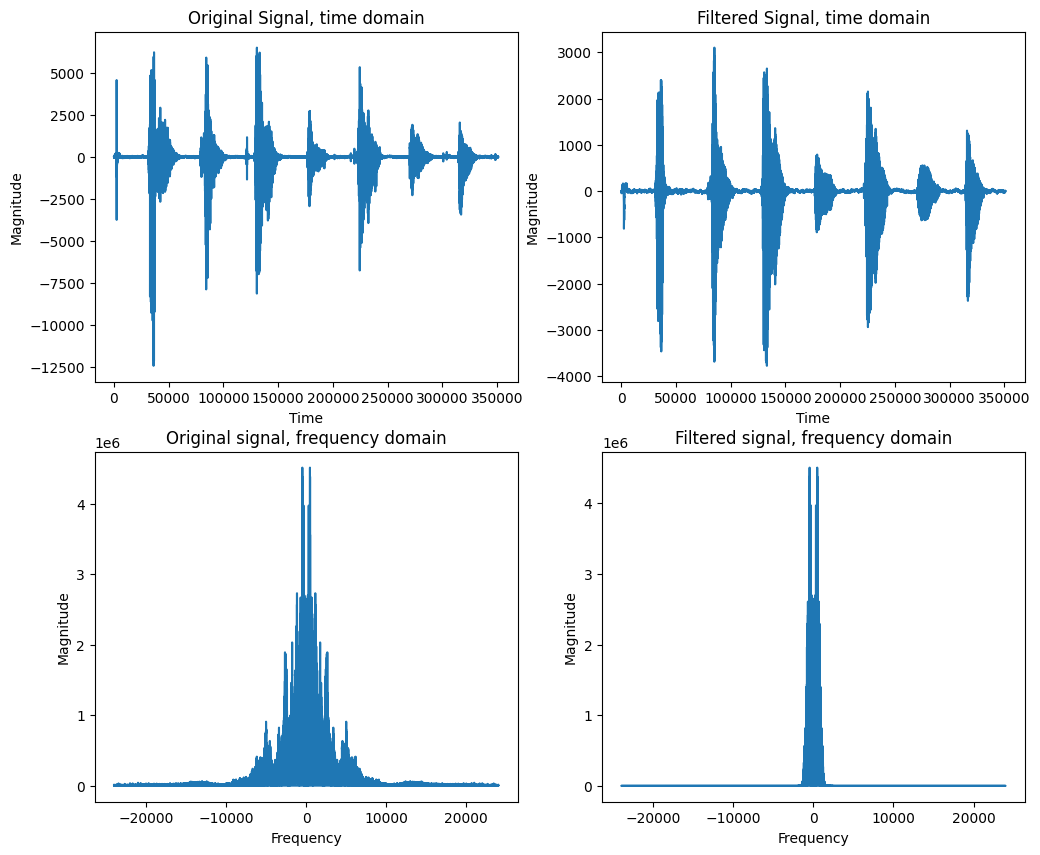

In [14]:
# Read sofa example, same as before
sofa_path = "audio/sofa.wav"
sample_rate, time_signal = read(sofa_path)
time_signal = np.array(time_signal[1:, 0],dtype=float)

# Filter time signal using butter lowpass filter, only let frequencies of frequency_cutoff pass
frequency_cutoff = 1000
filtered_signal = butter_lowpass_filter(time_signal, 1000, fs=sample_rate, order= 5)

fig, axs = plt.subplots(2, 2, figsize=(12,10))

# Plot the original signal in the time domain
axs[0, 0].plot(np.arange(len(time_signal)), time_signal)
axs[0, 0].set_title('Original Signal, time domain')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Magnitude')

# Plot the filtered signal in the time domain
axs[0, 1].plot(np.arange(len(filtered_signal)), filtered_signal)
axs[0, 1].set_title('Filtered Signal, time domain')
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Magnitude')

# Obtain freqeuncy domain
xf = fftfreq(len(time_signal), 1 / sample_rate)
yf_original = np.abs(fft(time_signal))
yf_filtered = np.abs(fft(filtered_signal))

# Plot the original signal in the frequency domain
axs[1, 0].plot(xf, yf_original)
axs[1, 0].set_title('Original signal, frequency domain')
axs[1, 0].set_xlabel('Frequency')
axs[1, 0].set_ylabel('Magnitude')

# Plot the filtered signal in the frequency domain
axs[1, 1].plot(xf, yf_filtered)
axs[1, 1].set_title('Filtered signal, frequency domain')
axs[1, 1].set_xlabel('Frequency')
axs[1, 1].set_ylabel('Magnitude')


Audio(filtered_signal, rate = sample_rate)


<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 10 - Manual filter calculations

*It is good thing to try at least one manual calculation of convolution with a filter, as terrible as it may sound...*

#### **10.1. Given the below values:**

$$x_n = \begin{cases} 
        \frac{1}{2} n  & \text{for} 0 \leq n \leq 6 \\
        0 & \text{elsewhere}
        \end{cases}
$$


$$h_n = \begin{cases} 
        1  & \text{for} -2 \leq n \leq 2 \\
        0 & \text{elsewhere}
        \end{cases}
$$

#### **Calculate $y(k)$ as a of the convolution $x(k) * h(k)$ for $k = -1$, $k = 4$ and $k = 7$**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

This might seem trivial, but can be quite tricky given that we need to know where the signal and filter actually overlaps:

The $\dots$ indicate where we know either the filter, signal, or both, only have 0 values...

$$y(-1) = \sum^\infty_{n = -\infty}x(n) h(-1 - n) = \dots x(-1) \cdot h(-1 -(-1)) + x(0) \cdot h(-1 -0) + x(1) \cdot h(-1 -1) + x(2) \cdot h(-1 -2) + \dots = \frac{1}{2} \cdot 0 \cdot 1 + \frac{1}{2} \cdot 1 \cdot 1 + \frac{1}{2} \cdot 2 \cdot 0 = \frac{1}{2}$$

For $k = -1$, we see that we first are limited by the signal is 0 (at $x(-1)$) and later, that the filter is 0 (at $h(-3)$)

$$y(4) = \dots + x(1) \cdot h(4 - 1) + x(2) \cdot h(4 - 2) + x(3) \cdot h(4 - 3) + x(4) \cdot h(4 - 4) + x(5) \cdot h(4 - 5) + x(6) \cdot h(4 - 6) + x(7) \cdot h(4 - 7) + \dots = \frac{1}{2} \cdot 1 \cdot 0 + \frac{1}{2} \cdot 2 \cdot 1 + \frac{1}{2} \cdot 3 \cdot 1 + \frac{1}{2} \cdot 4 \cdot 1 + \frac{1}{2} \cdot 5 \cdot 1 + \frac{1}{2} \cdot 6 \cdot 1 + \frac{1}{2} \cdot 0 \cdot 0 = \frac{20}{2}$$

For $k = 4$, we see that both filter and signal stop at $n = 7$, since $x(7) = 0$ and h(4 - 7 = -3) = 0$

$$y(7) = \dots + x(4) \cdot h(7 - 4) + x(5) \cdot h(7 - 5) + x(6) \cdot h(7 - 6) + x(7) \cdot h(7 - 7) + \dots = \frac{1}{2} \cdot 4 \cdot 0 + \frac{1}{2} \cdot 5 \cdot 1 + \frac{1}{2} \cdot 6 \cdot 1 + \frac{1}{2} \cdot 0 \cdot 1 = \frac{11}{2}$$

Finally here, we see that the signal 'gives out' before the filter does.

In general, calculating convolutions manually is terrible, don't ever do it for real, but it is good enough to do it a few times just to get the hang of it, it can be really difficult otherwise.

</span>

</span>

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### Exercise 11 - Fliter implementation

*Below we implement filtering manually, which can be scary. We do this in two ways: One is simply multiplying the values in the frequency spectrum. The other is using the filter from the aforementioned method to convolve the signal in time domain. This avoids the somewhat more stringent math of creating filters in the time domain.*

#### **11.1. 💻 Complete the code to perform filtering in the frequency domain** 

#### **11.2. Inspect the plots of the filtering code. Determine what kind of filter it is by looking at its impulse response, as well as the fourier spectrum of the filtered signal. Beware of the options `positive_freqs_only` and `human_speech_cutoff`, which will restrict the plot to only positive frequencies, and only human frequencies respectively**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

It is a lowpass filter.

Did the answer fool you? If so, it's probably because you did not have `positive_freqs_only` on. In that case, the filter looks kinda like a band-pass filter, but only because it is mirrored in the negative...

Try changing it to be a band-pass filter, so change the `cutoff_values` to `[1000, 2000]`. Now the filter in the frequency domain should look kinda like the world trade center (pre 2001)... Here, the band-pass is still mirrored in the negative frequencies

</span>

#### **11.3 💻. Change the type of the filter by changing the cutoff_freq parameter. Try to make a high-pass filter and a band-pass filter. Listen to the resulting audio from both these**


####  (OPTIONAL): **$\star \star$ 11.4. As mentioned, we can also filter in the time domain. Do so using the apply_convolution function and answer the following questions:**

1. **What do we use the IFFT for?**
2. **Why do we use np.roll?**
3. **What is the result of doing the convolution, compared to filtering in the frequency domain?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

1. The IFFT is used to get the filter in time domain. Remember we create the filter in the frequency domian by simply cutting off certain frequencies. We then transform this to an actual kernel by using the inverse fourier transform to take it back to the time domain.

---

2. np.roll is used to phase-shift the signal after convolution. When applying a high- or a low-pass filter, a time shift to the outputs is also applied. Usually when we talk about the **impulse response** of a filter (or the **freqeuncy response** if we fourier transform a filter), we are really only interested in the **magnitude response**, meaning how much the magnitude of each frequency shifts when we apply the filter. However, there is technically also a given **phase response**, which determines how much each frequency is shifted. In the case of our high- and low-pass filters, this is a **linear phase response**, meaning all frequencies are shifted by the same amount, which is rather low. Really the phase shift is mostly a result of the impulse respones of the kernel not being centered around the middle of the signal, there is another (trivial) phase shift introduces by the filter by itself. np.roll therefore, centers the impulse response of the filter so it is in the middle, rather than one at each end of signal.

    In some cases, the phase response of a filter can have a **non-linear phase response** as you can probably guess, this is really fucking terrible, since if you use the ifft to go back the original signal, it won't sound the same since the frequencies don't match up. Luckily some methods have been developed to counter this, including **predictive filters** (one example beinge [kalman filters](https://en.wikipedia.org/wiki/Kalman_filter)) that do not have a phase response, or [Vocoders](https://en.wikipedia.org/wiki/Vocoder) or [Neural vocoders](https://en.wikipedia.org/wiki/Deep_learning_speech_synthesis), that to a degree, synthesize normal speech from segments that don't otherwise match in phase.

---

3. The result of the convolution should be exactly the same the frequency domain filtering, barring perhaps small calculation errors and the aforementioned phase response. **Convolution in the time domain is the same as multiplication in the frequency domain**

</span>


</span>

In [15]:
def frequency_domain_filtering(time_signal : np.ndarray, sample_rate : int, cutoff_freq : list):
    """
    Filter a signal by multiplying its fourier transform with specific values
    Args:
        time_signal (np.ndarray): input time-domain signal
        sample_rate (int): sampling rate of the signal
        cutoff_freq (list): list of [low_cutoff, high_cutoff] frequencies. If either set to 0, we assume low or high pass filtering for that particular frequency
    """

    # Number of samples
    N = len(time_signal)

    # Get our frequency bins
    xf = fftfreq(N, 1 / sample_rate)

    # Find out if user did not give values for low or high-pass filtering
    if cutoff_freq[0] < 0:
        print("Low cutoff frequency not given, assuming lowpass filter and cutting off from 0!")
        cutoff_freq[0] = 0
    if cutoff_freq[1] <= 0:
        print("High cutoff frequency not given, assuming highpass filter, and cutting off at highest recordable frequency!")
        cutoff_freq[1] = len(xf) // 2 + 1
    
    # Find the index corresponding to the cutoff frequencies
    idx_lowpass = np.argmin(np.abs(xf - cutoff_freq[0]))
    idx_highpass = np.argmin(np.abs(xf - cutoff_freq[1]))

    # Create a frequency mask, (both positive and negative frequencies are included). Just applying this would set the amplitude of all frequencies to 0
    frequency_mask = np.zeros(len(xf))

    # For all frequency values in our lowpass:highpass range, set to 1
    frequency_mask[idx_lowpass:idx_highpass] = 1

    # Also handle negative frequencies
    frequency_mask[-idx_highpass:-idx_lowpass if cutoff_freq[0] > 0 else len(xf)] = 1  # Handle negative frequencies as well
    
    # Get fourier transformed signal
    yf = fft(time_signal)
    
    # Apply the frequency mask to the Fourier transformed signal
    yf_filtered = yf * frequency_mask
    
    # Perform inverse Fourier transform to get filtered time-domain signal
    filtered_signal = np.real(np.fft.ifft(yf_filtered))

    return filtered_signal, frequency_mask, xf, yf

def apply_convolution(time_signal: np.ndarray, frequency_mask: np.ndarray):
    """
    Apply convolution using a filter kernel obtained from inverse FFT of the frequency mask.
    Args:
        time_signal (np.ndarray): Original time-domain signal.
        frequency_mask (np.ndarray): Frequency mask used in the filtering process.
    Returns:
        convolved_signal (np.ndarray): Signal after applying convolution.
    """

    # Obtain the filter kernel by inverse Fourier transform of the frequency mask
    filter_kernel = np.real(ifft(frequency_mask))
    
    # Shift kernel to be centered (necessary since the kernel is symmetric)
    filter_kernel = np.roll(filter_kernel, len(filter_kernel) // 2)

    # Perform convolution with the time signal (if using convolution methods, don't use your own, use scipy's (it's faster))
    convolved_signal = convolve(time_signal, filter_kernel, mode='same')

    return convolved_signal, filter_kernel



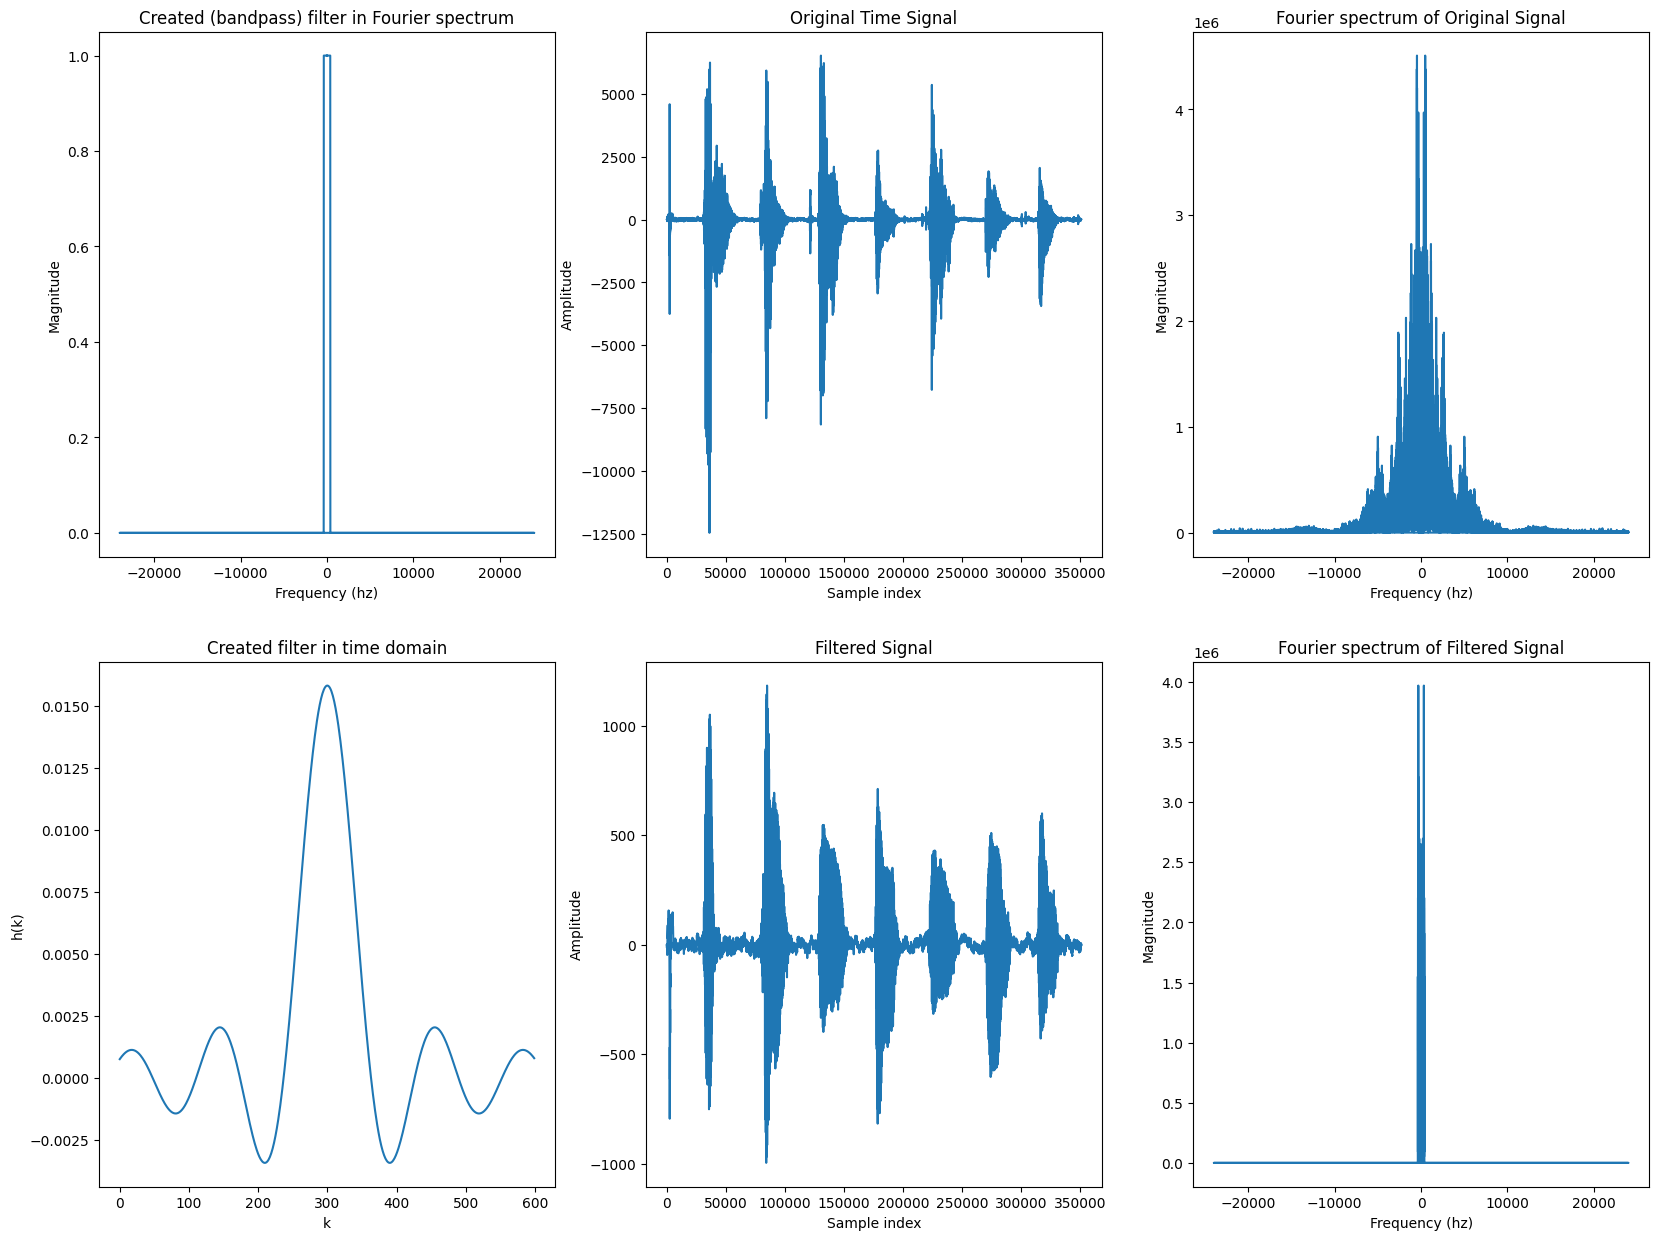

In [16]:
# Load audio same as before...
sofa_path = "audio/sofa.wav"
sample_rate, time_signal = read(sofa_path)
time_signal = np.array(time_signal[1:, 0],dtype=float)

# Decide whether you want the full or the partial plot
positive_freqs_only = False

# Decide whether we are only interested in the frequencies likely to be associated with human speech
human_speech_cutoff = False

if human_speech_cutoff and not positive_freqs_only:
    print("Warning: Cannot plot only human frequencies, if you do not cut off positive frequencies first...")
    print("I mean, you can, but it hasn't been implmeneted here...")

# Filter the signal in frequency domain
# filtered_signal, frequency_mask = frequency_domain_filtering(time_signal, sample_rate, cutoff_freq=[0, 380])
filtered_signal, frequency_mask, xf, _ = frequency_domain_filtering(time_signal, sample_rate, cutoff_freq=[0, 380])

# Filter signal in time domain using convolution
convolved_signal, time_filter = apply_convolution(time_signal, frequency_mask)

# Obtain the FFT of the original and filtered signals respectively
original_freq_domain = np.abs(fft(time_signal))
filtered_freq_domain = np.abs(fft(filtered_signal))

############## PLOTTING ##############

# Create a 3x2 subplot layout
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

# If we have requested to not have the positive frequencies at all...
if positive_freqs_only:
    xf_pos = xf[:len(time_signal) // 2]

    xs = xf_pos
    ys = frequency_mask[:len(xs)]
    
    # Furthermore, if we have requested to only get frequencies, likely to be in the human vocal range...
    if human_speech_cutoff:
        speech_mask = (xs >= 0) & (xs <= 8000)
        xs = xs[speech_mask]
        ys = ys[speech_mask]

# Else, we'll just get all, positive and negative frequencies
else:
    xs = np.arange(len(frequency_mask))
    xs = xf
    ys = frequency_mask


# Plot the filter kernel in frequency domain
axs[0, 0].plot(xs, ys)
axs[0, 0].set_title('Created (bandpass) filter in Fourier spectrum')
axs[0, 0].set_xlabel('Frequency (hz)')
axs[0, 0].set_ylabel('Magnitude')

# Plot filter in time domain
# Get 300 steps away from the center on both sides of the filter
center = len(time_filter) // 2
time_filter_limited = time_filter[center - 300 : center + 300]

axs[1, 0].plot(np.arange(len(time_filter_limited)), time_filter_limited)
axs[1, 0].set_title('Created filter in time domain')
axs[1, 0].set_xlabel('k')
axs[1, 0].set_ylabel('h(k)')

# Plot the original time signal
axs[0, 1].plot(np.arange(len(time_signal)), time_signal)
axs[0, 1].set_title('Original Time Signal')
axs[0, 1].set_xlabel('Sample index')
axs[0, 1].set_ylabel('Amplitude')

# Plot the convolved signal
axs[1, 1].plot(np.arange(len(filtered_signal)), filtered_signal)
axs[1, 1].set_title('Filtered Signal')
axs[1, 1].set_xlabel('Sample index')
axs[1, 1].set_ylabel('Amplitude')

# Same as above, but now for the signal in the time domain
if positive_freqs_only:
    xf_pos = xf[:len(time_signal) // 2]

    # Get frequency bins for plotting (positive frequencies only)
    xs = xf_pos
    original_freq_domain = original_freq_domain[:len(xs)]
    filtered_freq_domain = filtered_freq_domain[:len(xs)]

    # Apply speech mask if needed
    if human_speech_cutoff:
        speech_mask = (xs >= 80) & (xs <= 8000)
        xs = xs[speech_mask]
        original_freq_domain = original_freq_domain[speech_mask]
        filtered_freq_domain = filtered_freq_domain[speech_mask]
else:
    xs = np.arange(len(original_freq_domain))
    xs = xf
    # original_xs = np.arange(len(original_freq_domain))
    original_ys = original_freq_domain

    # filtered_xs = np.arange(len(filtered_freq_domain))
    filtered_ys = filtered_freq_domain

# Plot the Fourier domain of the original signal
axs[0, 2].plot(xs, original_freq_domain)
axs[0, 2].set_title('Fourier spectrum of Original Signal')
axs[0, 2].set_xlabel('Frequency (hz)')
axs[0, 2].set_ylabel('Magnitude')

# Plot the Fourier domain of the filtered signal
axs[1, 2].plot(xs, filtered_freq_domain)
axs[1, 2].set_title('Fourier spectrum of Filtered Signal')
axs[1, 2].set_xlabel('Frequency (hz)')
axs[1, 2].set_ylabel('Magnitude')


# Display the audio created
Audio(filtered_signal, rate = sample_rate)

<span style="color: #E6E6E6;">
<span style="background-color: #00695C; padding:8px; display:block; border-left:4px solid #4682b4">

### Optional Exercises starts

As mentioned, these are just some of the optional exercises from this and last time...

</span>

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### $\star$ Exercise 12 - The Short-Time Fourier transform

This is just to show what can also be done. There is something called the short time fourier transform (STFT). What this does is split a time signal into a bunch of smaller time intervals, and computes the fourier transform for each smaller interval. Laying all of these FT's in series produces what is known as a spectogram, which you may have already know from Intro to Intelligent systems

#### **12.1 Why would you do this?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">


The answer can vary, but the main reason is in use for signals where the frequency content can change quickly. Take for example human speech where the frequency content can change widely depending on what is being said.

Another example (that I am currently working on), is when you have a signal that has been filtered with an unknown signal and need to unfilter it. The STFT lets you amplify or attentuate frequencies on specific timesteps, rather than frequencies over the entire time domain. This lets you have much greater dergree of granularity when doing inverse problems such as that.

</span>

#### **12.2. How do you implement this?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Shown below. You need a few more parameters that the regular FT, most of which determine how the different time segments overlap. The 'window' parameter is a kind of filter that determines how one or more time segments overlap, while the nperseg is how many time units is used for each segment. A larger number creates a more 'mean value' for each segment and has smoother transitions, as well as being faster, while a smaller value gives greater granularity in what the frequency content is at a specific timestep, but can vary more and is slower.

</span>

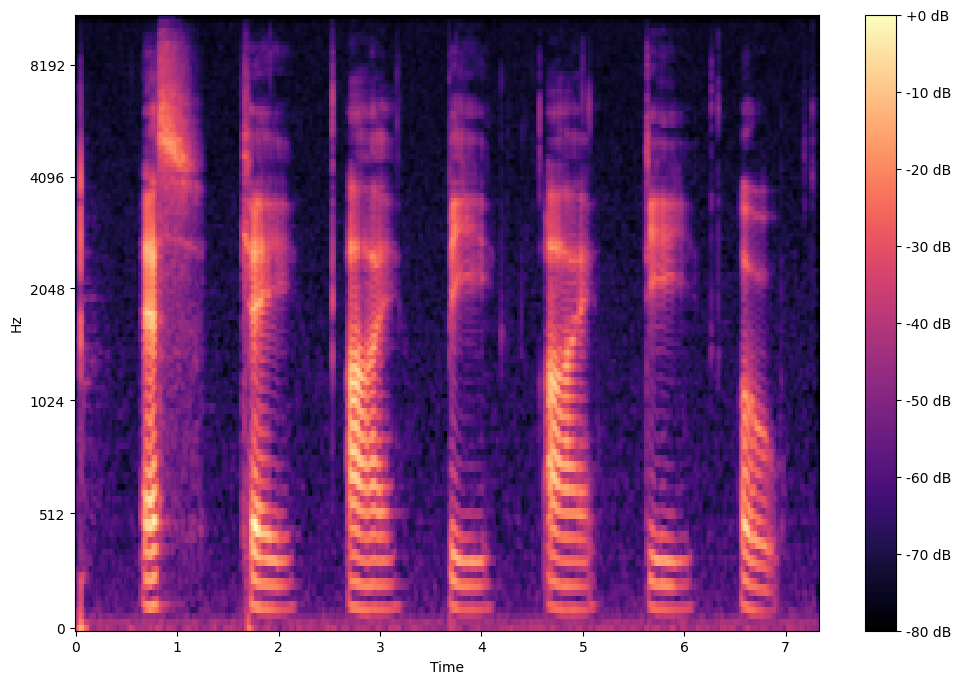

In [ ]:
############## MATPLOTLIB AND NUMPY IMPLEMENTATION - LESS 'BLACK BOXY' ##############
############## BUT GIVES *SHIT* SPECTROGRAMS! ##############
# def plot_stft(time_signal, sample_rate, max_freq=10000,
#                 smooth=True, convert_to_db=True, 
#                 threshold=75, title=None):
    
#     # Perform STFT
#     f, t, Zxx = stft(time_signal, fs=sample_rate, nperseg=1024,  window='hamming')

#     # Filter out the frequencies above the desired range
#     freq_mask = f <= max_freq
#     f_filtered = f[freq_mask]
#     Zxx_filtered = Zxx[freq_mask, :]

#     Zxx_magnitude = np.abs(Zxx_filtered)
    
#     if threshold: # If trehsold is set, remove all values below the (to reinforce the most important parts of the signal)
#         threshold = np.percentile(Zxx_magnitude, 75)
#         Zxx_magnitude[Zxx_magnitude < threshold] = 0
    
#     if convert_to_db:
#         Zxx_magnitude_db = 20 * np.log10(Zxx_magnitude + 1e-10)  # Add a small epsilon to avoid log(0)
        
#     else:
#         Zxx_magnitude_db = Zxx_magnitude

#     if smooth: # Smoothing to make the plot more visually appealing
#         from scipy.ndimage import gaussian_filter
#         Zxx_magnitude_db = gaussian_filter(Zxx_magnitude_db, sigma=0.5)

#     # Plot the spectrogram, here we use pcolormesh, since there is tehnically like three axes
#     plt.figure(figsize=(10, 6))
#     plt.pcolormesh(t, f_filtered, Zxx_magnitude_db, shading='gouraud')
#     if not title:
#         plt.title('Spectrogram of the Audio Signal')
#     else:
#         plt.title(title)
#     plt.ylabel('Frequency [Hz]')
#     plt.xlabel('Time [sec]')
#     plt.colorbar(label='Magnitude (dB)')
#     plt.show()


    # return time_signal, sample_rate


# def load_file_and_plot_stft(file_path, start_duration=None, **kwargs):  
#     """
#     Just a convenience function to load a file *and* plot the stft of it
#     """
#     sample_rate, time_signal = read(file_path)

#     if start_duration:
#         time_signal = time_signal[start_duration[0]*sample_rate: start_duration[0]*sample_rate +  start_duration[1]*sample_rate]

#     # Pre-process time signal
#     time_signal = np.array(time_signal[1:, 0], dtype=float)  # Indexed to make N odd


#     time_signal, sample_rate = plot_stft(time_signal, sample_rate, **kwargs)
#     return time_signal, sample_rate

# _ = load_file_and_plot_stft('audio/sofa.wav', title='Spectogram S O F A example')

# sample_rate, time_signal = read('R060_004.wav')
# time_signal = np.array(time_signal[1:, 0], dtype=float)  # Indexed to make N odd



######### LIBROSA IMPLEMENTATION - MUCH BETTER SPECTROGRAMS, MORE 'BLACK BOXY' #########
def plot_stft(time_signal, sample_rate,
                mel=True, title=None, **kwargs):

    # Compute spectrogram - Use mel spectogram to better capture frequencies of note
    if mel:
        spec = librosa.feature.melspectrogram(y=time_signal, sr=sample_rate)
    else:
        spec = np.abs(librosa.stft(y=time_signal)) ** 2
    # Convert power to decibels
    spec_db = librosa.power_to_db(spec, ref=np.max)

    # Plot spectrogram
    # fig, ax = plt.subplots(nrows = 1, ncols = 1)
    plt.figure(figsize=(12,8))
    img = librosa.display.specshow(spec_db, x_axis='time', y_axis='mel')
    # plt.colorbar(img, ax = ax, format='%+2.0f dB')
    plt.colorbar(img, format='%+2.0f dB')
    plt.title(title)
    plt.show()

    return time_signal, sample_rate

def load_file_and_plot_stft(file_path, existing_time_signal=None, start_duration=[0, None], **kwargs):
    # Load audio file
    time_signal, sample_rate = librosa.load(file_path, offset=start_duration[0], duration=start_duration[1], mono=True)

    # If we add an already-existing time_signal, just use it, useful for if we wanna show filtering.
    if existing_time_signal is not None:
        time_signal = existing_time_signal

    plot_stft(time_signal, sample_rate, **kwargs)
    return time_signal, sample_rate

_, _ = load_file_and_plot_stft('audio/sofa.wav')



**Having such a "clean" audio where there is almost no sound in many places is a big boring to look at, having for example a music clip might be more interesting...**

**Here is where the exercises end. If you want, I've collected a bunch of different examples of sound in the extra_spectograms folder that I think would be interesting to see both the spectogram of, if not also the fourier transform and the time domain signal. You can plot them using the below code if you want**

**Note, you can change the 'max_freq' if you want to see higher frequencies or want greater resolution on the lower frequencies.**

INFO: Remember to uncomment bottom filtering code if you wanna listen to or watch the filtered example


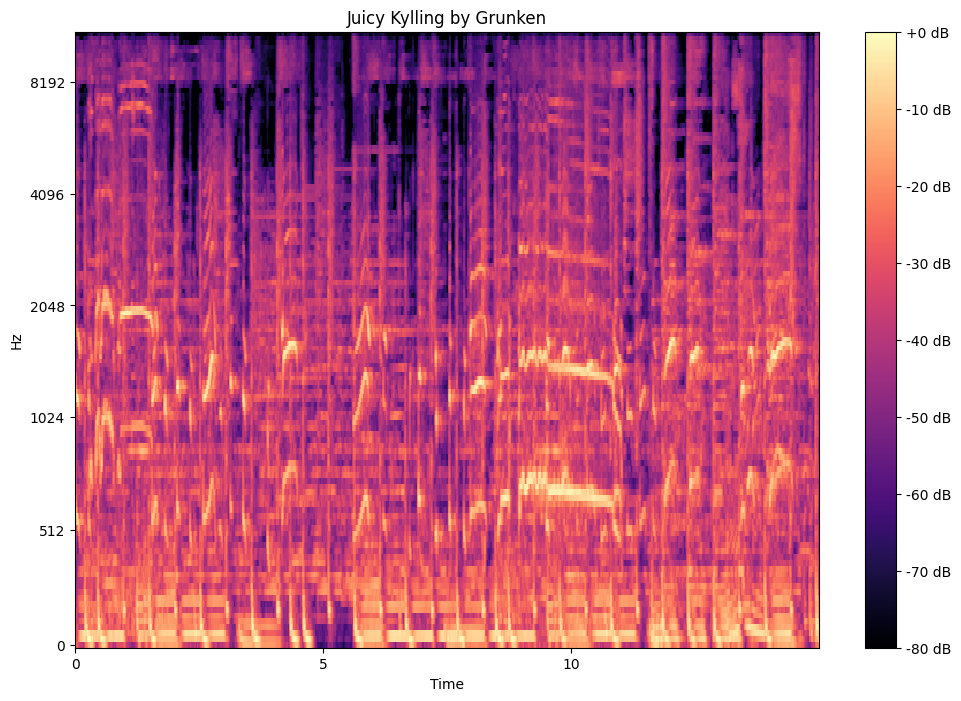

In [49]:
import titles

print("INFO: Remember to uncomment bottom filtering code if you wanna listen to or watch the filtered example")

# Typical examples of young-people music
time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/good_music.wav", start_duration=[30, 15], title=titles.all_titles[0])
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/hutcher.wav", title=titles.all_titles[1])
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/broken.wav", title=titles.all_titles[2])

# A bass singer (low pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/bass_singer.wav", title=titles.all_titles[3])

# A tenor singer (high pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/tenor_singer.wav", title=titles.all_titles[4])

# A guitar solo (medium pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/guitar_solo.wav", title=titles.all_titles[5])

# A bass solo (low pitch)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/bass_solo.wav", title=titles.all_titles[6])
# A songbird (perhaps distortion)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/songbird.wav", title=titles.all_titles[7])

# A human songbird (????)
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/human_songbird.wav", title=titles.all_titles[8])

# A bunch of people talking at the same time
# time_signal, sample_rate = load_file_and_plot_stft("extra_spectograms/people_talking.wav", title=titles.all_titles[9])



# # Optionally apply some filtering here
# cutoff_frequencies = [2000, 4000] # Initially, bandpass
# current_sound = "extra_spectograms/bass_singer.wav"
# time_signal, frequency_mask, _, _ = frequency_domain_filtering(time_signal, sample_rate, cutoff_freq=[2000, 4000])
# time_signal, sample_rate = load_file_and_plot_stft(current_sound, existing_time_signal=time_signal, title=titles.all_titles[3] + " (Filtered)")

# If you want to play the audio
Audio(time_signal,rate = sample_rate)


<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### $\star$ Exercise 13 - proving the fourier transform is linear

In exercise 4, we gave some examples that emperically "showed" that the fourier transform was linear.

### **13.1. Mathematically prove that the fourier transform (discrete case) is linear**

*Hint: Look at two different functions x and y, not different values of k*




</span>

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### $\star$ Exercise 14 - proving the fourier transform is linear

In exercise 4, we gave some examples that emperically "showed" that the fourier transform was linear.

### **14.1. Mathematically prove that the fourier transform (discrete case) is linear**

*Hint: Look at two different functions x and y, not different values of k*


<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">


Here we start by writing up the condition of linearity:

$$F(ax + by)(k) \sum^{N-1}_{n = 0}(ax(n) + by(n)) e^{-i 2\pi \frac{kn}{N}}$$

We can then split up the sums:

$$= \sum^{N-1}_{n = 0}ax(n) e^{-i 2\pi \frac{kn}{N}} + \sum^{N-1}_{n = 0}by(n) e^{-i 2\pi \frac{kn}{N}}$$

Take the constants out

$$= a\sum^{N-1}_{n = 0}x(n) e^{-i 2\pi \frac{kn}{N}} + b\sum^{N-1}_{n = 0}y(n) e^{-i 2\pi \frac{kn}{N}}$$

And end up with what we sought

$$= aF(x)(k) + bF(y)(k)$$

</span>


</span>

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### $\star$ Exercise 15 - The "power" of noise

#### **15.1 The variance of the noise is often referred to as the "power" of the noise, why do you supose this is?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">


The **power** of a signal is considered as the average energy per time unit for a signal. In the discrete case, this is $P = \frac{1}{N}\sum^{N-1}_{n=0}|x(n)^2|$. For zero-mean white noise, this is exactly its variance, since $\text{Var}(n) = E[(n - E[n])^2]$ where we know that $E[n] = 0$ as it is zero-mean. Therefore the power of white noise is exactly its variance

</span>

</span>

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### $\star$ Exercise 16 - Alice, Charlie and Bob's noise

Noise is present everywhere, but can be circumvented in quite a few cases. The following questions are mostly discussion and reflection questions, there may not be a 'true answer'

### **Case 16.1:**

Consider the following:

- **Alice uses her phone to call Bob.**
- **Alice's phone signal occupies the frequency range 600MHz to 1GHz (somewhat normal for phones).**
- **Charlie is right next to Alice during her call, and is watching a Joe Rogan podcast using Wifi, which he recieves on the frequency band 2.4GHz to 5GHz.**

#### **16.1.1 Is the call between Alice and Bob in danger of being cut off? Why/Why not?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

No, not at all. Unlike humans, machines are not at all distracted by different frequencies, so long as all information is conatined within distinct bands. In this case, the phone call band of Alice does not touch the wifi band of Charlie. 

You can see it in sine waves as well. We can add two sine waves of two different frequencies, and still perfectly recover the original two sine waves. It is only when we mix frequencies, that it becomes a problem.

</span>


#### **16.1.2 Say Charlie *wants* to mess with Alice and Bob by interrupting their call. How could he go about this?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">


Charlie could find the biggest, baddest radio transciever he can get that functions in the same frequency band as Alice, hook it up to the biggest power source he can find, and then simply make a call to whomever. This would generate a signal in the same frequency range as Alice's call, but on a much higher amplitude. Charlie's "Noise" would therefore drown out Alice's call. This is often referred to as "Jamming", and is the signal equivalent of shouting right next to two people trying to have a conversation.

*Extra note*: Charlie would not be able to do this on the regular celluar network, since modern cellphones have **a heap** of technologies to prevent them from interfering with one another. This is why thousands of people can use their cellphones in the same place with little to no loss of quality. An example of such a technology is **channel multiplexing** and is quite interesting to read about if you have the time.

</span>

#### **16.2. Reflect on what can cause noise in the following scenarios:**

1. **Talking in a crowded room**
2. **A phone getting wifi signal in a crowded mall**
3. **An alien race sending a signal to earth so NASA can hear it.**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

1. Other people talking
2. The other people's phones
3. Pretty much everything in space. We don't know on what frequencies and channels aliens usually transmit, so everything from the light of stars to radiation from black holes can influence the signal as noise.

</span>

#### **16.3. You are an engineer working for the well-known and respected military contractor, Suckheed Fartin (Skibidi Gyattin). Recently, the military has been having issues where nasty people have used radios to send mean messages to the pilots of fighter jets flying missions, this of course makes the pilots very sad, and the military wants a solution.**

**How would you, armed with your newfound knowledge of signal processing, go about solving the issue of these mean messages. For practical purposes, the pilots cannot turn off their radios or change the reciever frequencies on their radios**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

I see two possible solutions:

1. Using an active-noise-cancelling type strategy. Given that the pilots have probably heard enough insults at this point to know what they say, the jet radios can simply transmit the exact same waves as the ruffians' but phase-shifted 90 degrees. When two opposite waves meet, they cancel out.
2. Transmitting their own nasty words on the same channel, so the pilots cannot recieve the simply drowning out the noise. This, however, has the downside of also hitting whomever else is in the general area, and in a way, equates to turning your radio off for all but the most powerful transmitters. 

Fun fact: In the real world, military jets do exactly number two. Usually with radar waves instead of radio waves to prevent radars from accurately pinpointing their location.
</span>